## Softmax Regression

Softmax Regression is a type of regression algorithm that helps in classifying objects. It is used in multi-class classification problems. For example, given an 2x2 image file, it can classify whether it contains a cat, chicken or a dog. Moreover, it produces a probability value for each class and the highest value is used for classification. 

It is also considered as a single-layer neural network.




## One-Hot Encoding

As machine learning algorithms only understands numbers, we encode the strings or characters. One of the most famous method is One-Hot Encoding. It produces a vector with as many components as the number of classes and the component corresponding to a particular instance'class is set to 1 and all other components are set to 0.

For example, lets assume there are three labels: cat, chicken and dog. Then the animal classfied as cat can be viewed as (1, 0, 0)



## Network Architecture

To represent the Softmax Regression, we need a model with three output nodes (multiple outputs), one per each class (one-hot encoding). While training the model, we will pass the features in the model, and get three outputs. The maximum value indicates the correct class. 

Lets assume we have four features and three classes, then we need four weights and 1 bias, which will be used to linearly combine the input features to give us an output. Moreover, we will compute three outputs for each input as there are three classes. 

$$ o_1 = x_1w_{11} + x_2w_{12} + w_3w_{13} + w_4w_{14} + b$$
$$ o_2 = x_1w_{21} + x_2w_{22} + w_3w_{23} + w_4w_{24} + b$$
$$ o_3 = x_1w_{31} + x_2w_{32} + w_3w_{33} + w_4w_{34} + b$$

By using Linear Algebra to compress these equations: $o = Wx + b$

## Softmax Operation

In order to train the model, we need to optimise the model paramteres to produce probabilities that maximise the likelihood of the observed data. 

The Softmax function is used to transform our logits (outputs) such that they become non-negative and sum to 1. This function exponentiate each logits and divide them by their sum:
$$\hat{y} = softmax(o)$$
$$ \hat{y}_j = \frac{exp(o_j)}{\sum_k exp(o_k)} $$

For each instance, there will be probability value for each classes such that their sum will be 1 ($\hat{y}_1 + \hat{y}_2 + \hat{y}_3 $ = 1). Thus, $\hat{y}$ is a proper probability distribution whole element values can be intrepreted accordingly. 

## Mathematical Representation 

We train our model in minibatches of data. Lets assume minibatch X of examples with features dimensionality $d$ and batch size $n$, and there are $q$ classes, then:
- $X \in R^{n*d}$, $W \in R^{d*q}$ and $b \in R^{1*q}$
- $O = XW + b$
- $\hat{Y} = softmax(O)$

## Loss Function

The softmax function gives us a vector $\hat{y}$, which can be interpreted as the estimated probabilities of each class given an input $x$. 
- E.g., $\hat{y} = P(y=cat|x)$

Suppose the wholw dataset consist of n examples 
- The i-th example has feature vector $x^{i}$ and a one-hot label vector $y^{i}$
    - If the correst class for the i-th example is the k-th class, then the k-th element of $y^{i}$, denoted by $y_k^i$ will be 1 and all other elements will be 0.
    - According the Maximum Likelhood we want to maximise the probability that the model assign the correct class to the i-th example: 
     $$P(y=y_k^{(i)} | x^{(i)}) = \hat{y}_k$$
    - This can also be written as :
    $$P(y=y_k^{(i)} | x^{(i)}) = P(y=y_k^{(i)} | x^{(i)})^{y_k^{(i)}}$$
    $$P(y=y_k^{(i)} | x^{(i)}) = \prod_{j=1}^q P(y=y_j^{(i)} | x^{(i)})^{y_j^{(i)}}$$
    $$P(y=y_k^{(i)} | x^{(i)}) = \prod_{j=1}^q \hat{y}_j^{y_j^{(i)}}$$

    - The above equation calculates the product of all probabilities of each classes for an instance. This function has a maximum value 1, and therefore can be maximise to find the optimal paramteres. 
    
    - This is equivalent to minimizing the negative log-likelihood:
    $$l(y^{(i)}, \hat{y}^{(i)}) = - \sum_{j=1}^q y_j^{(i)} log \hat{y}_j^{(i)} $$


## Cross Entropy Loss

The total loss is calculated over all examples: 
$$CE = \sum_{i=1}^n l(y^{(i)} , \hat{y}^{(i)})$$

- This is called the Cross-Entropy Loss. 
- Since $y$ is a one-hot vector of length $q$, the sum of over all its coordinates j vanishes for all but one term. 
- Since all $\hat{y}_j$ are predicted probabilites, their logarithm is never larger than 0.

## Implementation of Softmax Regression  


In [3]:
!pip install torchvision

     |████████████████████████████████| 13.2 MB 3.6 MB/s 
     |████████████████████████████████| 119.6 MB 92 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.8.0
    Uninstalling torch-1.8.0:
      Successfully uninstalled torch-1.8.0


In [15]:
import torch
import my_utils as mu
from IPython import display

In [28]:
batch_size = 256
train_iter, test_iter = mu.load_data_fashion_mnist(batch_size)

In [29]:
X, y = next(iter(train_iter))
print(X.size())
print(y)

torch.Size([256, 1, 28, 28])
tensor([4, 1, 9, 6, 3, 1, 1, 0, 6, 0, 3, 0, 4, 9, 4, 3, 5, 6, 7, 9, 2, 8, 1, 0,
        8, 4, 5, 2, 5, 0, 1, 4, 6, 7, 6, 0, 5, 2, 6, 6, 6, 0, 2, 9, 3, 2, 1, 8,
        6, 7, 9, 0, 9, 0, 2, 7, 8, 0, 6, 7, 2, 8, 0, 9, 0, 7, 1, 4, 9, 0, 1, 5,
        4, 0, 4, 4, 3, 7, 5, 0, 4, 1, 9, 5, 3, 4, 9, 8, 1, 4, 5, 4, 8, 9, 2, 1,
        8, 9, 1, 0, 9, 6, 7, 3, 6, 0, 7, 9, 5, 4, 9, 7, 3, 9, 4, 6, 7, 2, 2, 2,
        5, 9, 6, 2, 6, 4, 0, 0, 8, 4, 2, 3, 7, 8, 8, 6, 0, 9, 7, 6, 2, 0, 4, 4,
        4, 2, 4, 9, 1, 0, 6, 7, 4, 5, 5, 2, 0, 7, 0, 6, 4, 0, 6, 8, 1, 2, 3, 8,
        0, 5, 7, 5, 8, 4, 8, 5, 5, 1, 8, 7, 3, 0, 1, 8, 5, 6, 7, 2, 7, 1, 9, 2,
        4, 5, 9, 3, 9, 1, 4, 8, 6, 5, 0, 0, 1, 4, 8, 8, 7, 9, 6, 6, 3, 2, 0, 1,
        9, 6, 7, 7, 3, 4, 5, 4, 2, 8, 7, 9, 4, 3, 3, 0, 7, 4, 8, 7, 3, 8, 9, 2,
        2, 8, 9, 3, 8, 1, 6, 8, 3, 8, 1, 1, 9, 4, 4, 8])


## Defining the Model and Initialisation

- Each example in the dataset is represented by a fixed length vector: flatten 28x28 images, treating it as vector of size 784.
- As there are 10 classes, our model need to have 10 outputs.
- So our weights will be a 784x10 matrix and the bias will be a 10x1 vector. 

In [30]:
class Net(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(Net, self).__init__()
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.Linear1 = torch.nn.Linear(n_inputs, n_outputs)
        self.initialise_parameters()
    
    def initialise_parameters(self):
        if isinstance(self.Linear1, torch.nn.Linear):
            torch.nn.init.normal_(self.Linear1.weight, std=0.01)
            torch.nn.init.zeros_(self.Linear1.bias)

    def forward(self, x):
        x = x.view(-1, self.n_inputs)
        out = self.Linear1(x)
        return out

n_inputs, n_outputs = 784, 10
net = Net(n_inputs, n_outputs)
print(net)


Net(
  (Linear1): Linear(in_features=784, out_features=10, bias=True)
)


## Loss Function

In [31]:
loss = torch.nn.CrossEntropyLoss()

## Optimization Algorithm

In [32]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

## Evaluation

In [33]:
def accuracy(y_hat, y):  #y_hat is a matrix; 2nd dimension stores prediction scores for each class.
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # Predicted class is the index of max score         
    cmp = (y_hat.type(y.dtype) == y)  # because`==` is sensitive to data types
    return float(torch.sum(cmp))

y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
accuracy(y_hat, y)/len(y)

0.5

In [8]:
class Accumulator:
    """For accumulating sums over `n` variables"""

    def __init__(self, n):
        self.data = [0.0] * n
    
    def add(self, *args):
        self.data = [a + float(b) for a,b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [34]:
def evaluate_accuracy(net, data_iter):
    """Compute the accuracy for a model on a dataset."""
    metric = Accumulator(2) # No of correct predictions, no of predictions
    for _, (X, y) in enumerate(data_iter):
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0]/metric[1]

In [35]:
evaluate_accuracy(net, test_iter)

0.1265

## Training

In [36]:
def train_epoch(net, train_iter, loss, optimizer):
    if isinstance(net, torch.nn.Module):
        net.train()
    
    # Sum of training loss, sum of training accuracy, no of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat,  y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        metric.add(float(l)*len(y), accuracy(y_hat, y), y.size().numel())

    # Average Training Loss, Average Training Accuracy
    return metric[0]/metric[2], metric[1] / metric[2]

In [37]:
class Animator:  #@save
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        mu.use_svg_display()
        self.fig, self.axes = mu.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: mu.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [38]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer):  #@save
    """Train a model."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

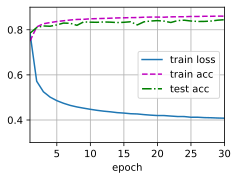

In [39]:
num_epochs = 30
train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer)